## 1. Import Libraries

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [416]:
import warnings

warnings.filterwarnings('ignore')

## 2. Download Dataset


In [417]:
!wget https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv

--2023-03-02 16:40:15--  https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53593 (52K) [text/plain]
Saving to: ‘car_evaluation.csv.1’

car_evaluation.csv. 100%[===================>]  52.34K  --.-KB/s    in 0.001s  

2023-03-02 16:40:15 (48.8 MB/s) - ‘car_evaluation.csv.1’ saved [53593/53593]



## 3. Import Dataset

In [418]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

## 4. Exploratory Data Analysis

Now, I will explore the data to gain insights about the data. 

### 4.1. Checks dimensions of dataset

In [419]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### 4.2. View top 5 rows of dataset

In [420]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### 4.3. Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [421]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [422]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### 4.4. View Summary of Data

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### 4.5. Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [424]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    print(df[col].value_counts())   
    print("")

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### 4.6. Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### 4.7. Missing values in variables

In [425]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

### 4.8. Explore `class` variable

In [426]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

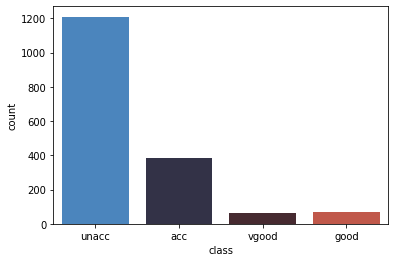

In [427]:
sns.countplot(x='class', data=df, palette='icefire')
plt.show()

We can see from the graph, there is an imbalance in the amount of data from each class. Later, we need to handle this imbalanced data

## 5. Preprocessing Data

### 5.1. Split data feature (X) and target (y)

In [428]:
X = df.drop(['class'], axis=1)

y = df['class']

In [429]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [430]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

### 5.2. Split data into separate training and test set

Before training a model, the data need to divided into train and test data. Now, I'm going to split the dataset in a ratio of 8:2.

In [431]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [432]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

### 5.3. Feature Engineering

First, I will check the data types of variables again.

In [433]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

**Encode categorical variables**


Now, I will encode the categorical variables.

In [434]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


We can see that all  the variables are ordinal categorical data type.

In [435]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [436]:
# import category encoders

import category_encoders as ce

In [437]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [438]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [439]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


### 5.4. Handling imbalance data

In [440]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

Now we will handle the imbalanced data by using undersampling techniques.

In [441]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({'unacc': 975, 'acc': 301, 'good': 58, 'vgood': 48})
After undersampling:  Counter({'acc': 301, 'good': 58, 'unacc': 48, 'vgood': 48})


In [442]:
# check again the shape of X_train after undersampling

X_train_under.shape, X_test.shape

((455, 6), (346, 6))

Okay, our data has been balanced!

We now have training and test set ready for model building. 

## 6. Modelling

### 6.1. Modelling Decision Tree Classifier with criterion gini index

In this decision tree model, it uses `criterion = 'entropy'`

In [443]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [465]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=48)


# fit the model
clf_gini.fit(X_train_under, y_train_under)

DecisionTreeClassifier(random_state=48)

**Predict the Test set results with criterion gini index**

In [466]:
y_pred_gini = clf_gini.predict(X_test)

**Check accuracy score with criterion gini index**

In [467]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9364


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

**Compare the train-set and test-set accuracy**

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [468]:
y_pred_train_gini = clf_gini.predict(X_train_under)

y_pred_train_gini

array(['acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc',

In [469]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_under, y_pred_train_gini)))

Training-set accuracy score: 1.0000


**Check for overfitting and underfitting**

In [470]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train_under, y_train_under)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9364


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 0.9364. The model is overfitting, train > test, 100% > 93.64% 



### 6.2. Modelling Decision Tree Classifier with criterion gini index and feature selection

In [471]:
# view the feature scores

feature_scores = pd.Series(clf_gini.feature_importances_, index=X_train_under.columns).sort_values(ascending=False)

feature_scores

safety      0.249925
maint       0.211931
lug_boot    0.206469
buying      0.191098
persons     0.074991
doors       0.065586
dtype: float64

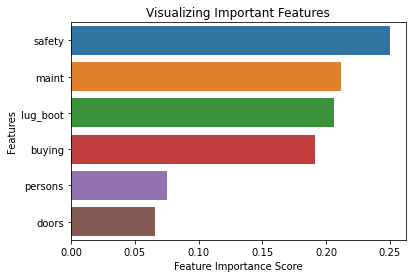

In [472]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Berdasarkan feature importance, feature `doors` memiliki nilai terendah, yakni 0.065. Kita dapat drop feature dan build model kembali.





In [473]:
X_train_under

,buying,maint,doors,persons,lug_boot,safety
0,4,3,3,1,2,1
1,2,1,2,1,1,1
2,2,1,4,2,1,1
3,4,4,2,1,3,1
4,2,4,2,2,2,1
...,...,...,...,...,...,...
450,3,4,1,1,3,1
451,3,4,1,2,3,1
452,2,3,1,1,3,1
453,2,2,2,1,3,1


In [474]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3
...,...,...,...,...,...,...
100,1,1,1,1,2,2
274,1,3,3,3,3,2
1206,2,2,4,1,2,3
101,1,1,1,1,2,1


In [475]:
# drop feature doors
X_train_under_drop1 = X_train_under.drop(['doors'], axis=1)
X_test_drop1 = X_test.drop(['doors'], axis=1)

In [476]:
X_train_under_drop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    455 non-null    int64
 1   maint     455 non-null    int64
 2   persons   455 non-null    int64
 3   lug_boot  455 non-null    int64
 4   safety    455 non-null    int64
dtypes: int64(5)
memory usage: 17.9 KB


In [477]:
X_test_drop1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 599 to 1084
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    346 non-null    int64
 1   maint     346 non-null    int64
 2   persons   346 non-null    int64
 3   lug_boot  346 non-null    int64
 4   safety    346 non-null    int64
dtypes: int64(5)
memory usage: 16.2 KB


In [478]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini_feature_importance = DecisionTreeClassifier(criterion='gini', random_state=0)

# fit the model
clf_gini_feature_importance.fit(X_train_under_drop1, y_train_under)

# predict test set
y_pred_feature_gini = clf_gini_feature_importance.predict(X_test_drop1)

# check accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_feature_gini)))

# compare
y_pred_train_gini = clf_gini_feature_importance.predict(X_train_under_drop1)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_under, y_pred_train_gini)))

# check overfitting & underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini_feature_importance.score(X_train_under_drop1, y_train_under)))

print('Test set score: {:.4f}'.format(clf_gini_feature_importance.score(X_test_drop1, y_test)))


Model accuracy score with criterion gini index: 0.9306
Training-set accuracy score: 0.9714
Training set score: 0.9714
Test set score: 0.9306


Here, the training-set accuracy score is 0.9714 while the test-set accuracy to be 0.9306. These two values are quite comparable (1-4%). So, there is no sign of overfitting. 


### 6.3. Modelling Decision Tree Classifier with criterion entropy

In [479]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', random_state=21)


# fit the model
clf_en.fit(X_train_under, y_train_under)

DecisionTreeClassifier(criterion='entropy', random_state=21)

**Predict the Test set results with criterion entropy**

In [480]:
y_pred_en = clf_en.predict(X_test)

**Check accuracy score with criterion gini index**

In [481]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9220


**Compare the train-set and test-set accuracy**

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [482]:
y_pred_train_en = clf_en.predict(X_train_under)

y_pred_train_en

array(['acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc',

In [483]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_under, y_pred_train_en)))

Training-set accuracy score: 1.0000


**Check for overfitting and underfitting**

In [484]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train_under, y_train_under)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9220


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 0.9220. The model is overfitting, train > test, 100% > 92.2%


### 6.4. Modelling Decision Tree Classifier with criterion entropy and feature selection

In [485]:
# view the feature scores

feature_scores = pd.Series(clf_en.feature_importances_, index=X_train_under.columns).sort_values(ascending=False)

feature_scores

safety      0.241684
buying      0.231915
maint       0.225680
lug_boot    0.158431
persons     0.087370
doors       0.054920
dtype: float64

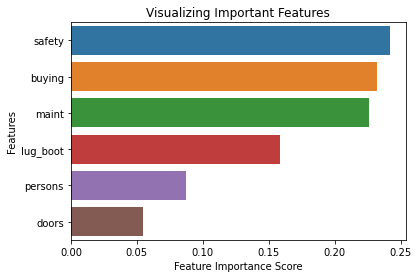

In [486]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Berdasarkan feature importance, feature `doors` memiliki nilai terendah, yakni 0.054. Kita dapat drop feature dan build model kembali.





In [487]:
# drop feature doors
X_train_under_drop2 = X_train_under.drop(['doors'], axis=1)
X_test_drop2 = X_test.drop(['doors'], axis=1)

In [488]:
X_train_under_drop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    455 non-null    int64
 1   maint     455 non-null    int64
 2   persons   455 non-null    int64
 3   lug_boot  455 non-null    int64
 4   safety    455 non-null    int64
dtypes: int64(5)
memory usage: 17.9 KB


In [489]:
X_test_drop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 599 to 1084
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    346 non-null    int64
 1   maint     346 non-null    int64
 2   persons   346 non-null    int64
 3   lug_boot  346 non-null    int64
 4   safety    346 non-null    int64
dtypes: int64(5)
memory usage: 16.2 KB


In [490]:
# instantiate the DecisionTreeClassifier model with criterion entropy index
clf_entropy_feature_importance = DecisionTreeClassifier(criterion='entropy', random_state=21)

# fit the model
clf_entropy_feature_importance.fit(X_train_under_drop2, y_train_under)

# predict test set
y_pred_feature_en = clf_entropy_feature_importance.predict(X_test_drop2)

# check accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_feature_en)))

# compare
y_pred_train_en = clf_entropy_feature_importance.predict(X_train_under_drop2)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_under, y_pred_train_en)))

# check overfitting & underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_entropy_feature_importance.score(X_train_under_drop2, y_train_under)))

print('Test set score: {:.4f}'.format(clf_entropy_feature_importance.score(X_test_drop2, y_test)))


Model accuracy score with criterion entropy index: 0.9162
Training-set accuracy score: 0.9714
Training set score: 0.9714
Test set score: 0.9162


We can see that the score obtained is the same as the model score of decision tree classifier with criterion gini index and feature selection. The training-set accuracy score is 0.9714 while the test-set accuracy to be 0.9162. The model is overfitting, train > test, 100% > 92.2%



### 6.5. Tune Hyperparameter with GridSearchCV for the DecisionTreeClassifier model

In [491]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf_tune = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf_tune.fit(X_train_under, y_train_under)
print(clf_tune.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'splitter': 'best'}


In [492]:
clf_tune_best = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=None, splitter='best', random_state=21)

# fit the model
clf_tune_best.fit(X_train_under, y_train_under)

DecisionTreeClassifier(max_depth=10, random_state=21)

In [493]:
y_pred_tune = clf_tune_best.predict(X_test)

In [494]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with GridSearchCV: {0:0.4f}'. format(accuracy_score(y_test, y_pred_tune)))

Model accuracy score with GridSearchCV: 0.9393


In [495]:
y_pred_train_tune = clf_tune_best.predict(X_train_under)

y_pred_train_tune

array(['acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc',

In [496]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_under, y_pred_train_tune)))

Training-set accuracy score: 0.9692


In [497]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_tune_best.score(X_train_under, y_train_under)))

print('Test set score: {:.4f}'.format(clf_tune_best.score(X_test, y_test)))

Training set score: 0.9692
Test set score: 0.9393


We can see that the score obtained is the same as the model score of decision tree classifier with criterion (gini or entropy) and feature selection. The training-set accuracy score is 0.9692 while the test-set accuracy to be 0.9393. These two values are quite comparable (1-4%). So, there is no sign of overfitting. 

### 6.6. Tune Hyperparameter with GridSearchCV and feature selection for the DecisionTreeClassifier model

In [498]:
# view the feature scores

feature_scores = pd.Series(clf_tune_best.feature_importances_, index=X_train_under.columns).sort_values(ascending=False)

feature_scores

safety      0.272326
maint       0.230926
buying      0.207540
lug_boot    0.187232
persons     0.074855
doors       0.027121
dtype: float64

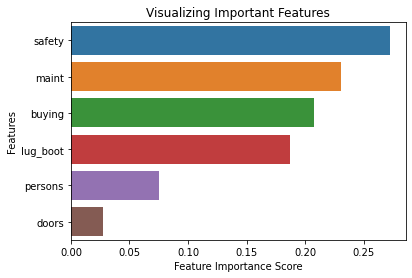

In [499]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Berdasarkan feature importance, feature `doors` memiliki nilai terendah, yakni 0.027. Kita dapat drop feature dan build model kembali.





In [500]:
# drop feature doors
X_train_under_drop3 = X_train_under.drop(['doors'], axis=1)
X_test_drop3 = X_test.drop(['doors'], axis=1)

In [501]:
# instantiate the DecisionTreeClassifier model with gridsearchcv
clf_tune_best_feature_importance = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=None, splitter='best', random_state=21)

# fit the model
clf_tune_best_feature_importance.fit(X_train_under_drop3, y_train_under)

# predict test set
y_pred_tune_feature = clf_tune_best_feature_importance.predict(X_test_drop3)

# check accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score with gridsearchcv and feature selection index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_tune_feature)))

# compare
y_pred_train_tune = clf_tune_best_feature_importance.predict(X_train_under_drop3)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_under, y_pred_train_tune)))

# check overfitting & underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_tune_best_feature_importance.score(X_train_under_drop3, y_train_under)))

print('Test set score: {:.4f}'.format(clf_tune_best_feature_importance.score(X_test_drop3, y_test)))


Model accuracy score with gridsearchcv and feature selection index: 0.9364
Training-set accuracy score: 0.9582
Training set score: 0.9582
Test set score: 0.9364


Here, the training-set accuracy score is 0.9582 while the test-set accuracy to be 0.9364. These two values are quite comparable (1-4%). So, there is no sign of overfitting. 


### 6.7. Modelling Random Forest

In [502]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [503]:
# instantiate the Random Forest model
clf_rf = RandomForestClassifier(max_depth = 7,random_state = 48)

# fit the model
clf_rf.fit(X_train_under, y_train_under)

RandomForestClassifier(max_depth=7, random_state=48)

**Predict the Test set results**

In [504]:
y_pred_rf = clf_rf.predict(X_test)

**Check accuracy score**

In [505]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with Random Forest: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score with Random Forest: 0.8237


**Compare the train-set and test-set accuracy**

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [506]:
y_pred_train_rf = clf_rf.predict(X_train_under)

y_pred_train_rf

array(['acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'acc',
       'acc', 'acc',

In [507]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_under, y_pred_train_rf)))

Training-set accuracy score: 0.8571


**Check for overfitting and underfitting**

In [508]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_rf.score(X_train_under, y_train_under)))

print('Test set score: {:.4f}'.format(clf_rf.score(X_test, y_test)))

Training set score: 0.8571
Test set score: 0.8237


Here, the training-set accuracy score is 0.8571 while the test-set accuracy to be 0.8237. These two values are quite comparable. So, there is no sign of underfitting. 


Now, based on the analysis above, we can conclude that best fitting model (neither overfitting and underfitting) is a model with tuning hyperparameter, balanced data and feature selection.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 7. Evaluation

In [509]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_gini)

print("Model 1: Decision Tree with Gini Index")
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_gini))

Model 1: Decision Tree with Gini Index
Confusion matrix

 [[ 76   4   1   2]
 [  0  10   0   1]
 [ 10   0 225   0]
 [  2   2   0  13]]
              precision    recall  f1-score   support

         acc       0.86      0.92      0.89        83
        good       0.62      0.91      0.74        11
       unacc       1.00      0.96      0.98       235
       vgood       0.81      0.76      0.79        17

    accuracy                           0.94       346
   macro avg       0.82      0.89      0.85       346
weighted avg       0.94      0.94      0.94       346



In [511]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_feature_gini)

print("Model 2: Decision Tree with Gini Index & Feature Selection")
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_feature_gini))

Model 2: Decision Tree with Gini Index & Feature Selection
Confusion matrix

 [[ 75   7   0   1]
 [  0   9   0   2]
 [  8   0 227   0]
 [  3   3   0  11]]
              precision    recall  f1-score   support

         acc       0.87      0.90      0.89        83
        good       0.47      0.82      0.60        11
       unacc       1.00      0.97      0.98       235
       vgood       0.79      0.65      0.71        17

    accuracy                           0.93       346
   macro avg       0.78      0.83      0.79       346
weighted avg       0.94      0.93      0.93       346



In [512]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_en)

print("Model 3: Decision Tree with Entropy")
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_en))

Model 3: Decision Tree with Entropy
Confusion matrix

 [[ 76   6   1   0]
 [  0  10   0   1]
 [ 15   0 220   0]
 [  2   2   0  13]]
              precision    recall  f1-score   support

         acc       0.82      0.92      0.86        83
        good       0.56      0.91      0.69        11
       unacc       1.00      0.94      0.96       235
       vgood       0.93      0.76      0.84        17

    accuracy                           0.92       346
   macro avg       0.82      0.88      0.84       346
weighted avg       0.94      0.92      0.93       346



In [514]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_feature_en)

print("Model 4: Decision Tree with Entropy & Feature Selection")
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_feature_en))

Model 4: Decision Tree with Entropy & Feature Selection
Confusion matrix

 [[ 75   7   0   1]
 [  0   9   0   2]
 [ 13   0 222   0]
 [  3   3   0  11]]
              precision    recall  f1-score   support

         acc       0.82      0.90      0.86        83
        good       0.47      0.82      0.60        11
       unacc       1.00      0.94      0.97       235
       vgood       0.79      0.65      0.71        17

    accuracy                           0.92       346
   macro avg       0.77      0.83      0.79       346
weighted avg       0.93      0.92      0.92       346



In [516]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_tune)

print("Model 5: Decision Tree with Tune Hyperparameter GridSearchCV")
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_tune))

Model 5: Decision Tree with Tune Hyperparameter GridSearchCV
Confusion matrix

 [[ 81   2   0   0]
 [  1   9   0   1]
 [ 10   0 225   0]
 [  4   3   0  10]]
              precision    recall  f1-score   support

         acc       0.84      0.98      0.91        83
        good       0.64      0.82      0.72        11
       unacc       1.00      0.96      0.98       235
       vgood       0.91      0.59      0.71        17

    accuracy                           0.94       346
   macro avg       0.85      0.83      0.83       346
weighted avg       0.95      0.94      0.94       346



In [517]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_tune_feature)

print("Model 6: Decision Tree with Tune Hyperparameter GridSearchCV & Feature Selection")
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_tune_feature))

Model 6: Decision Tree with Tune Hyperparameter GridSearchCV & Feature Selection
Confusion matrix

 [[ 78   5   0   0]
 [  1   9   0   1]
 [  8   0 227   0]
 [  4   3   0  10]]
              precision    recall  f1-score   support

         acc       0.86      0.94      0.90        83
        good       0.53      0.82      0.64        11
       unacc       1.00      0.97      0.98       235
       vgood       0.91      0.59      0.71        17

    accuracy                           0.94       346
   macro avg       0.82      0.83      0.81       346
weighted avg       0.95      0.94      0.94       346



In [518]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_rf)

print("Model 7: Random Forest")
print('Confusion matrix\n\n', cm)
print(classification_report(y_test, y_pred_rf))

Model 7: Random Forest
Confusion matrix

 [[ 83   0   0   0]
 [  7   4   0   0]
 [ 42   0 193   0]
 [ 11   1   0   5]]
              precision    recall  f1-score   support

         acc       0.58      1.00      0.73        83
        good       0.80      0.36      0.50        11
       unacc       1.00      0.82      0.90       235
       vgood       1.00      0.29      0.45        17

    accuracy                           0.82       346
   macro avg       0.85      0.62      0.65       346
weighted avg       0.89      0.82      0.83       346



## 17. Results and conclusion


1.	In this project, I build a Decision-Tree Classifier and Random-Forest Classifier model to predict the safety of the car. I build seven (7) models:
      

*   Decision Tree Classifier with criterion gini index
*   Decision Tree Classifier with criterion gini index and feature selection
* Decision Tree Classifier with criterion entropy
* Decision Tree Classifier with criterion entropy and feature selection
* Decision Tree Classifier with Tune Hyperparameter GridSearchCV
* Decision Tree Classifier with Tune Hyperparameter GridSearchCV and feature selection
* Random Forest


`entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
2.	In the model with criterion `gini index`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4.	In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5.	The confusion matrix and classification report yields very good model performance.